In [1]:
from ppo_fitre import FitrePPO, FitreMlpPolicy
from f16_simulation import gcas_simulation, initial_space
from CoRec.envs.F16.AeroBenchVVPython.code.plot import plot3d_anim, plot3d
from stable_baselines import PPO2
import numpy as np

W0115 00:23:39.933133 140351187826496 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
fitre_model = FitrePPO.load("rl_train_res/fitre_best_trail/fitre_f16.zip")
ppo_model = PPO2.load("rl_train_res/ppo.zip")

/home/zxiong/development/general_dev_p3/lib/python3.6/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [3]:
import gym
import CoRec

In [4]:
env = gym.make("F16GCAS-v3")
obs = env.reset()
fitre_state_list = [env.state]

reward_sum = 0
for _ in range(2000):
    obs, r, done, _ = env.step(fitre_model.predict(obs)[0])
    fitre_state_list.append(env.state)
    reward_sum += r


Saving animation to 'rl_train_res/fit_f16_passed.gif' using 'imagemagick'...
Finished saving to rl_train_res/fit_f16_passed.gif in 434.2 sec


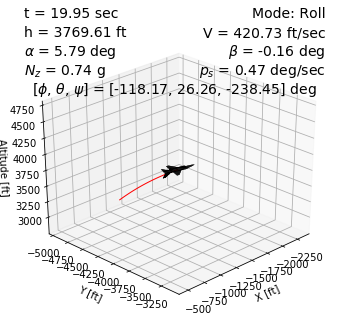

In [5]:
plot3d_anim(env.unwrapped.times[:2000], env.unwrapped.states[:2000], env.unwrapped.modes[:2000], env.unwrapped.ps_list[:2000], env.unwrapped.Nz_list[:2000], filename="rl_train_res/fitre_f16_passed.gif")

In [7]:
env = gym.make("F16GCAS-v3")
fitre_model.set_env(env)
obs = env.reset()
ppo_state_list = [env.state]

reward_sum = 0
for _ in range(2000):
    obs, r, done, _ = env.step(ppo_model.predict(obs)[0])
    ppo_state_list.append(env.state)
    reward_sum += r

Wrapping the env in a DummyVecEnv.



Saving animation to 'rl_train_res/ppo_f16_passed.gif' using 'imagemagick'...
Finished saving to rl_train_res/ppo_f16_passed.gif in 431.4 sec


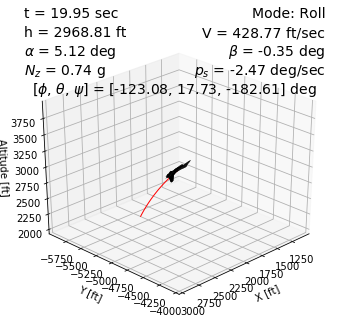

In [8]:
plot3d_anim(env.unwrapped.times[:2000], env.unwrapped.states[:2000], env.unwrapped.modes[:2000], env.unwrapped.ps_list[:2000], env.unwrapped.Nz_list[:2000], filename="rl_train_res/ppo_f16_passed.gif")

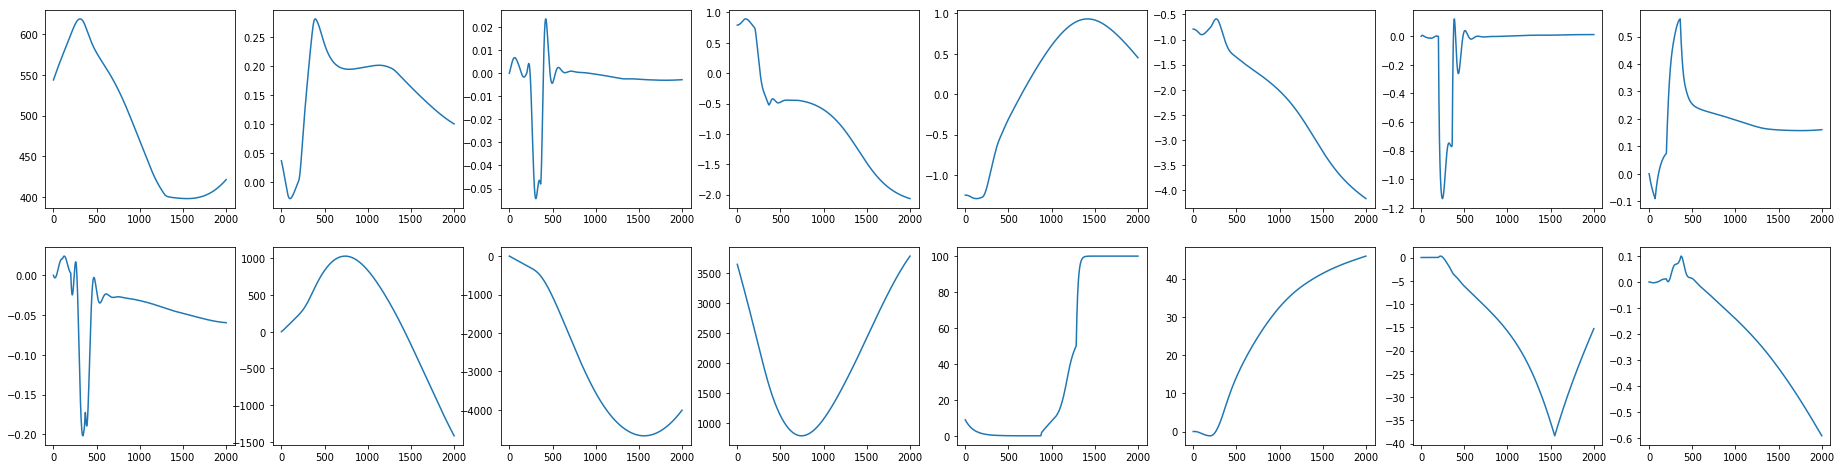

In [9]:
import matplotlib.pyplot as plt

states_array = np.array(fitre_state_list)
fig, axis = plt.subplots(2, 8, figsize=[32, 8])
for i in range(16):
    _ = axis[i//8][i%8].plot(np.arange(len(states_array)), states_array[:, i])

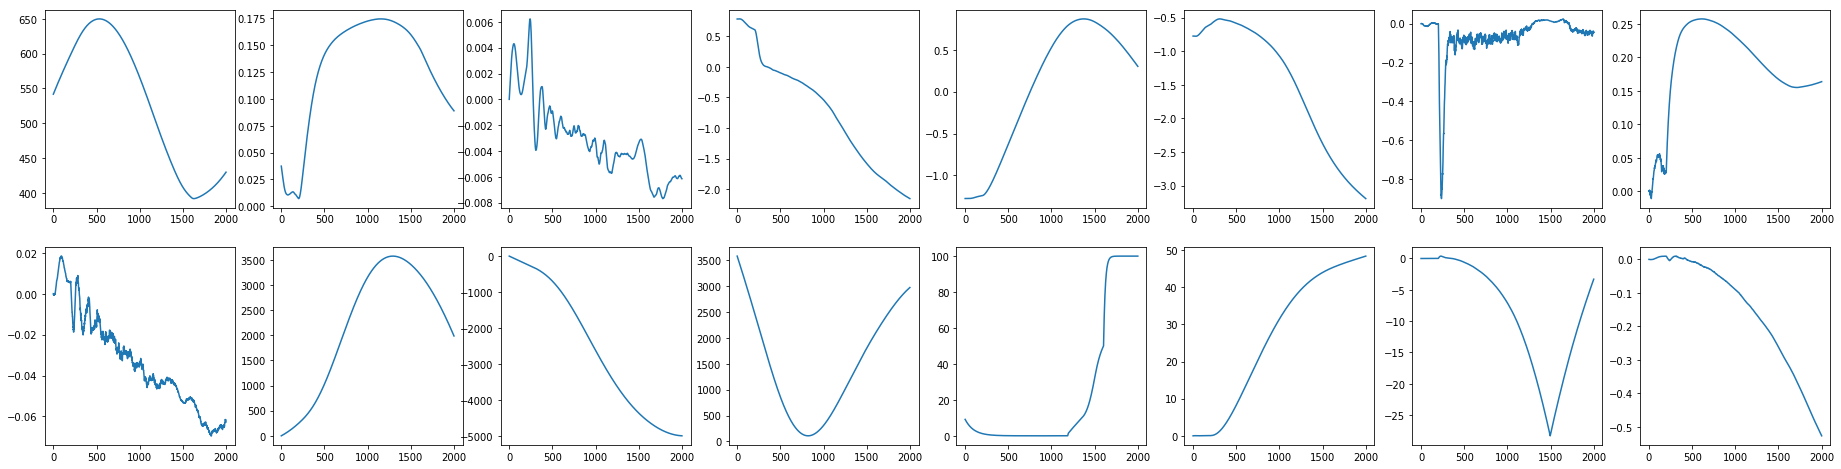

In [10]:
states_array = np.array(ppo_state_list)
fig, axis = plt.subplots(2, 8, figsize=[32, 8])
for i in range(16):
    _ = axis[i//8][i%8].plot(np.arange(len(states_array)), states_array[:, i])

PPO:  
![](rl_train_res/ppo_f16_passed.gif)

FITRE:  
![](rl_train_res/fitre_f16_passed.gif)